# Scenarios

The scenarios are taken from https://twiki.cern.ch/twiki/bin/view/LHCPhysics/SUSYCrossSections.

Modifications:
-   we set the STAUMIX values to maximally mixed for sleptons
-   we manually set the massses of all particles tagged with an @a or {M...} 

In [3]:
#%load_ext nb_black
import hepi


print(hepi.__version__)
import smpl
from smpl import data
import numpy as np
import hepi.resummino as rs
import hepi.util as util
import matplotlib.pyplot as plt

rs.set_path("~/git/resummino/build")
print(rs.get_path())

test_lo = False
analyse  = True # else generation

plt.rcParams.update({'font.size': 15})
plt.rc('legend', fontsize=12)
#rm tex files
from smpl import io
import os
for _,_,f in io.files(".tex"):
    os.remove(f)

0.2.0.0+dirty
~/git/resummino/build


# aNNLO+NNLL sleptons

In [3]:
params = [
    "sleptons.slha",
]
pss = [
    (+1000011, -1000011),  # l_L^+ l_L^-
    (+2000011, -2000011),  # l_R^+ l_R^-
    (+1000015, -1000015),  # l_1^+ l_1^-
]
for pa, pb in pss:
    for energy in [13000, 13600]:
        name = str(energy) + "_sleptons_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir("output_" + name +"/")
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000011,
                    2000011,
                    1000012,
                    1000013,
                    2000013,
                    1000014,
                    1000015,
                    2000015,
                    1000016,
                ],
                range(100, 1010, 100),
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000011,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000011,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000011,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000011,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,1)
                    axs[1].set_ylim(0.25,1.75)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{l}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000011")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=False, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000011,show=True,interpolator='exp')

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


QUEUEING TASKS | Checking input:   0%|          | 0/470 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/470 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/470 [00:00<?, ?it/s]

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||= 470 jobs


KeyboardInterrupt: 

# aNNLO+NNLL wino


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


QUEUEING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

Skipped: 940 Not skipped: 0


QUEUEING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04045435475783379% vs scale:0.40541037224950827% to -0.18847517775507%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04230219169884242% vs scale:0.3571007674122106% to -0.19407321069839029%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04180527233142186% vs scale:0.3368956659138532% to -0.17152811497472129%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03931620674353476% vs scale:0.3180219752501102% to -0.14653354007815456%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: Runt

QUEUEING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

Skipped: 940 Not skipped: 0


QUEUEING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04309664509704866% vs scale:0.2120437718733099% to -0.6469057675028789%
  warnings.warn(


QUEUEING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.042504779518476164% vs scale:0.3680169775711219% to -0.19312803752200894%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04241434348898593% vs scale:0.35194078791296% to -0.17283168618762182%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03910128610715482% vs scale:0.3182469601325751% to -0.16916657091272358%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.039759457550221214% vs scale:0.33496563543567603% to -0.1339546680761239%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: Ru

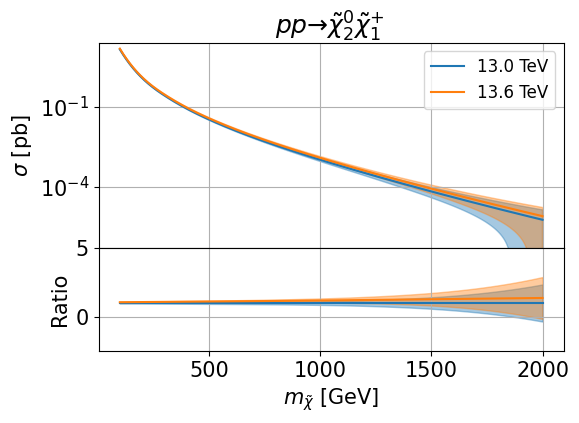

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


QUEUEING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

Skipped: 940 Not skipped: 0


QUEUEING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04134919369924972% vs scale:0.2863499316017135% to -0.180590470929161%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04362717909632595% vs scale:0.26139926787058876% to -0.14218526430809397%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.043057843638519014% vs scale:0.2660054788139857% to -0.12732570955876013%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04595181643037749% vs scale:0.22174233526896073% to -0.13230112143708558%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: R

QUEUEING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

Skipped: 940 Not skipped: 0


QUEUEING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04019589582312767% vs scale:0.19060031369651903% to -0.6646996844352451%
  warnings.warn(


QUEUEING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03890398681110522% vs scale:0.2638187738855267% to -0.1722466747660393%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04378058105893512% vs scale:0.2492803266843277% to -0.1305525929371378%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.044226545984885006% vs scale:0.23890024627582804% to -0.13326337704482513%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.038283612637996456% vs scale:0.20666390311529464% to -0.1229026266958958%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: R

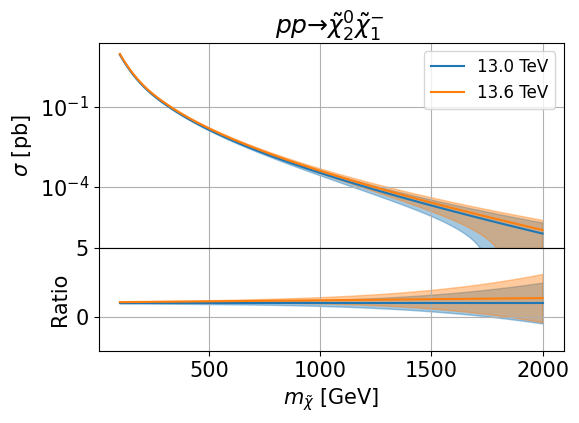

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


QUEUEING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

Skipped: 940 Not skipped: 0


QUEUEING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04158041783058077% vs scale:0.34935582628844475% to -0.20344146580165332%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.040357461591111074% vs scale:0.35141254086713164% to -0.16827730006482142%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03952253667702437% vs scale:0.30887901101090237% to -0.15600876866522861%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.040030946304389345% vs scale:0.3124144262549292% to -0.142238771648373%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276:

QUEUEING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/940 [00:00<?, ?it/s]

Skipped: 940 Not skipped: 0


QUEUEING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/940 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ LO:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:LO 0.04200231668635053% vs scale:0.10601719446194516% to -0.5614510769642985%
  warnings.warn(


QUEUEING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ NLO:   0%|          | 0/20 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/20 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.04081819266183245% vs scale:0.3528031721292706% to -0.18267706047241655%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03948894972762649% vs scale:0.30723993250114257% to -0.1617394921082837%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.03969118836956526% vs scale:0.3031950922326803% to -0.14618835681564987%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.039791905929072745% vs scale:0.3148491442186817% to -0.12945601862782902%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:276: R

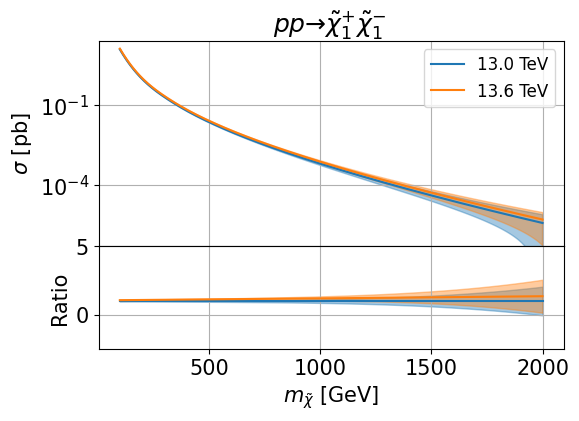

In [2]:
params = [
    "wino.slha",
]
pss = [
    ( 1000023, +1000024),  # N1C1p
    ( 1000023, -1000024),  # N1C1m
    (+1000024, -1000024),  # C1pC1m
]
for pa, pb in pss:
    for energy in [13000, 13600]:
        name = str(energy) + "_wino_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
               "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                    energy,
                    pa,
                    pb,
                    param,
                    "PDF4LHC21_40",
                    "PDF4LHC21_40",
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
            li = [i]
            li = hepi.masses_scan(
                    li,
                    [
                        1000022,
                        1000023,
                        1000024,
                    ],
                    range(100,2010,100),
                )
            if not test_lo:

                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,25)
                    axs[1].set_ylim(-2.5,5.0)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000022")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000022,show=True,interpolator='cubic',pre=np.log,post=np.exp)

# aNNLO+NNLL hino degenerate


In [ ]:
params = [
    "hino.slha",
]
pss = [
    (1000022, +1000024),  # N2C1p
    (1000022, -1000024),  # N2C1m
    (+1000024, -1000024),  # C1pC2m
    (1000022, 1000023),  # N2N1
]
for pa, pb in pss:
    for energy in [13000, 13600]:
        # save to different folders to have some substructure
        name = str(energy) + "_hino_deg_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
            "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000022,
                    1000023,
                    1000024,
                ],
                range(100, 1510, 100),
                negate=[1000022],
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,plot_data=False,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000023,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000023,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,10)
                    axs[1].set_ylim(0,2.5)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000023")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=False, run=True, parse=True)
                hepi.mass_plot(rs_dl,"LO",1000023,show=True,interpolator='exp')

# aNNLO+NNLL hino non-degenerate

In [ ]:
params = [
    "higgsino_slha_C1C1.slha",
]
pss = [
    ( 1000023, +1000024),  # N2C1p
    ( 1000023, -1000024),  # N2C1m
    (+1000024, -1000024),  # C1pC1m
    ( 1000022,  1000023),  # N2N1
]
import urllib

dl = hepi.load(
    urllib.request.urlopen(
        "https://raw.githubusercontent.com/APN-Pucky/xsec/master/json/pp13_hinosplit_N2N1_NLO%2BNLL.json"
    ),
    dimensions=2,
)
N1 = dl["N1"]
N2 = dl["N2"]
NX = dl["N1"] / 2 + dl["N2"] / 2
for pa, pb in pss:
    for energy in [13000, 13600]:
        # save to different folders to have some substructure
        name= str(energy) + "_hino_nondeg_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
            "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.slha_scan_rel(
                li,
                lambda r: [
                    ["MASS", 1000022, N1[r]],
                    ["MASS", 1000023, -N2[r]],
                    ["MASS", 1000024, NX[r]],
                ],
                range(len(N1)),
            )
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=True, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True)
                    
                    
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()
                    #"""
                    hepi.mapplot(rs_dl[mask],"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{aNNLO+NNLL}}$ [pb]")

                    hepi.title(li[0],pdf_info=False,scenario="")

                    xx,yy = data.flatmesh(np.linspace(50,320,100),np.linspace(80,320,100))
                    dll = hepi.interpolate_2d(rs_dl[mask],"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xx,yy,interpolator="linearnd",pre=np.log,post=np.exp)             
                    hepi.mapplot(dll,"MASS_1000022","MASS_1000024","aNNLO_PLUS_NNLL_COMBINED",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{aNNLO+NNLL}}$ [pb]",fill_missing=False)
                    
                    hepi.title(li[0],pdf_info=False,scenario="")
                    plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                    plt.show()
                    #"""
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","MASS_1000022")
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","MASS_1000023")
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","MASS_1000024")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
                
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"MASS_1000022","MASS_1000024","LO",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{\\chi}_1^-}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")

## Squark mass dependence in wino-charginos

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


QUEUEING TASKS | Checking input:   0%|          | 0/18095 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/18095 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/18095 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/18095 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/18095 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/18095 [00:00<?, ?it/s]

Skipped: 18095 Not skipped: 0


QUEUEING TASKS | Parsing:   0%|          | 0/18095 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/18095 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/18095 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:285: RuntimeWarning: too bad numerical precision vs scale @ num:NLO 0.07126700880797032% vs scale:0.31367103356200815% to -0.8516633378408041%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:285: RuntimeWarning: too bad numerical precision vs scale @ num:NLO 0.07113330338307308% vs scale:0.2896911170566776% to -0.8327764614502055%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:285: RuntimeWarning: too bad numerical precision vs scale @ num:NLO 0.07112162517244278% vs scale:0.26383749600778117% to -0.9108321301808472%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:285: RuntimeWarning: too bad numerical precision vs scale @ num:NLO 0.07189260330925948% vs scale:0.24764951805614677% to -1.1028141903437312%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:285: RuntimeWarning: too bad numerical precision vs scal

QUEUEING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:285: RuntimeWarning: too bad numerical precision vs scale @ num:aNNLO_PLUS_NNLL 0.1529541048067923% vs scale:1.0442500618927553% to -0.7169835345123156%
  warnings.warn(


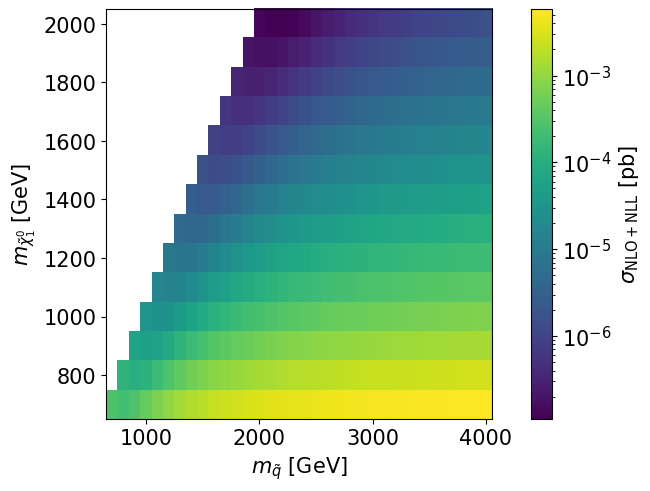

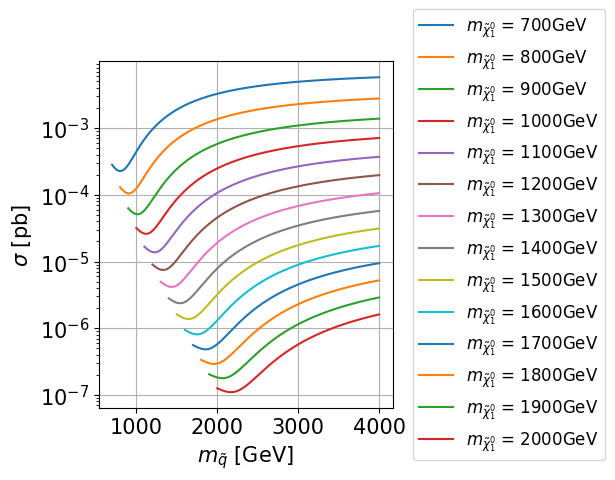

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


QUEUEING TASKS | Checking input:   0%|          | 0/18095 [00:00<?, ?it/s]

PROCESSING TASKS | Checking input:   0%|          | 0/18095 [00:00<?, ?it/s]

COLLECTING RESULTS | Checking input:   0%|          | 0/18095 [00:00<?, ?it/s]

QUEUEING TASKS | Preparing:   0%|          | 0/18095 [00:00<?, ?it/s]

PROCESSING TASKS | Preparing:   0%|          | 0/18095 [00:00<?, ?it/s]

COLLECTING RESULTS | Preparing:   0%|          | 0/18095 [00:00<?, ?it/s]

Skipped: 18095 Not skipped: 0


QUEUEING TASKS | Parsing:   0%|          | 0/18095 [00:00<?, ?it/s]

PROCESSING TASKS | Parsing:   0%|          | 0/18095 [00:00<?, ?it/s]

COLLECTING RESULTS | Parsing:   0%|          | 0/18095 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

QUEUEING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | PDF uncertainty @ aNNLO_PLUS_NNLL:   0%|          | 0/385 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

COLLECTING RESULTS | Scale uncertainty @ LO:   0%|          | 0/385 [00:00<?, ?it/s]

QUEUEING TASKS | Scale uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

PROCESSING TASKS | Scale uncertainty @ NLO:   0%|          | 0/385 [00:00<?, ?it/s]

In [ ]:
test_lo=False
params = [
    "wino_sq.slha",
]
pss = [
    ( 1000023, +1000024),  # N1C1p
    ( 1000023, -1000024),  # N1C1m
    (+1000024, -1000024),  # C1pC1m
]
m_xs=range(700,2010,100)
for pa, pb in pss:
    for energy in [13000,13600]:
        name = "sqsq_" + str(energy) + "_wino_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
            "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                    energy,
                    pa,
                    pb,
                    param,
                    "PDF4LHC21_40",
                    "PDF4LHC21_40",
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
            li = [i]
            li = hepi.masses_scan(
                   li,
                    [
                        1000022,
                        1000023,
                        1000024,
                     ],
                     m_xs,
                 )
            li = hepi.masses_scan(
                     li,
                    [
                       1000001,
                       1000002,
                       1000003,
                       1000004,
                       2000001,
                       2000002,
                       2000003,
                       2000004,
                   ],
                   range(700,4010,100), # decoupling else 1e5
               )
            li = hepi.remove_where(li,lambda d : d["mass_1000001_1000002_1000003_1000004_2000001_2000002_2000003_2000004"] < d["mass_1000022_1000023_1000024"])
            if not test_lo:

                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    
                    mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()
                    hepi.mapplot(rs_dl[mask],"mass_1000001_1000002_1000003_1000004_2000001_2000002_2000003_2000004","mass_1000022_1000023_1000024","aNNLO_PLUS_NNLL",yaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",xaxis="$m_{\\tilde{q}}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")
                    plt.show()
                    for m_x in m_xs:
                        hepi.mass_plot(rs_dl[mask][rs_dl[mask]["mass_1000022_1000023_1000024"]==m_x],"aNNLO_PLUS_NNLL",1000002,data_fmt=".",lpos=6,bbox_to_anchor=(1.04,0.5),interpolate_label="$m_{\\tilde{\\chi}_1^0}$ = " + str(m_x) + "GeV",xaxis="$m_{\\tilde{q}}$ [GeV]",cont=True,plot_data=False,interpolate=True)
                    plt.show()
                    for m_x in m_xs:
                        hepi.mass_plot(rs_dl[mask][rs_dl[mask]["mass_1000022_1000023_1000024"]==m_x],"aNNLO_PLUS_NNLL",1000002,K=True,data_fmt=".",lpos=6,bbox_to_anchor=(1.04,0.5),interpolate_label="$m_{\\tilde{\\chi}_1^0}$ = " + str(m_x) + "GeV",xaxis="$m_{\\tilde{q}}$ [GeV]",cont=True,plot_data=False,interpolate=True)
                    plt.show()
                    #hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000022")
                    #hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"mass_1000001_1000002_1000003_1000004_2000001_2000002_2000003_2000004","mass_1000022_1000023_1000024","LO",yaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",xaxis="$m_{\\tilde{q}}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")
                plt.show()
                for m_x in m_xs:
                    hepi.mass_plot(rs_dl[rs_dl["mass_1000022_1000023_1000024"]==m_x],"LO",1000002,data_fmt=".",lpos=6,bbox_to_anchor=(1.04,0.5),interpolate_label="$m_{\\tilde{\\chi}_1^0}$ = " + str(m_x) + "GeV",xaxis="$m_{\\tilde{q}}$ [GeV]",cont=True,plot_data=False,interpolate=True)
                plt.show()

In [ ]:
test_lo=True
params = [
    "hino.slha",
]
pss = [
    (1000022, +1000024),  # N2C1p
    (1000022, -1000024),  # N2C1m
    (+1000024, -1000024),  # C1pC2m
    (1000022, 1000023),  # N2N1
]
for pa, pb in pss:
    for energy in [13600]:
        # save to different folders to have some substructure
        name = str(energy) + "_hino_deg_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
            "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                energy,
                pa,
                pb,
                param,
                "PDF4LHC21_40",
                "PDF4LHC21_40",
                1.0,
                1.0,
                id="0.0.0",
                precision=0.001,
                max_iters=50,
            )
            li = [i]
            li = hepi.masses_scan(
                li,
                [
                    1000022,
                    1000023,
                    1000024,
                ],
                range(700, 2010, 100),
                negate=[1000022],
            )
            li = hepi.masses_scan(
                     li,
                    [
                       1000001,
                       1000002,
                       1000003,
                       1000004,
                       2000001,
                       2000002,
                       2000003,
                       2000004,
                   ],
                   range(700,4100,100), # decoupling else 1e5
            )
            
            if not test_lo:
                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,plot_data=False,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000023,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000023,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000023,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,10)
                    axs[1].set_ylim(0,2.5)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000023")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"mass_1000022_1000023_1000024","mass_1000001_1000002_1000003_1000004_2000001_2000002_2000003_2000004","LO",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{q}}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")
                plt.show()
                hepi.mass_plot(rs_dl,"LO",1000002,data_fmt=".",show=True,interpolate=False)
                hepi.mass_plot(rs_dl[rs_dl["mass_1000022_1000023_1000024"]==100],"LO",1000002,data_fmt=".",show=True,interpolate=False)
                

In [ ]:
test_lo=True
params = [
    "wino_ch.slha",
]
pss = [
    (+1000024, -1000024),  # C1pC1m
]
for pa, pb in pss:
    for energy in [13600]:
        name = str(energy) + "_wino_" + str(pa) + "_" + str(pb)
        hepi.set_output_dir(
               "output_" + name + "/"
        )
        rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
        for param in params:
            i = hepi.Input(
                hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                    energy,
                    pa,
                    pb,
                    param,
                    "PDF4LHC21_40",
                    "PDF4LHC21_40",
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
            li = [i]
            li = hepi.masses_scan(
                    li,
                    [
                        1000022,
                        1000023,
                        1000024,
                    ],
                    range(100,2010,100),
                )
            li = hepi.masses_scan(
                    li,
                    [
                        1000006,
                        2000006,
                    ],
                    range(0,4010,100),
                )
            if not test_lo:

                li = hepi.seven_point_scan(li)
                li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                if not analyse:
                    rs_dl = rs.run(li, skip=False, run=False, parse=False)
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                    rs_dl = hepi.pdf_errors(li,rs_dl)
                    rs_dl = hepi.scale_errors(li,rs_dl)
                    rs_dl = hepi.combine_errors(rs_dl)
                    if energy == 13000:
                        fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})         # Remove horizontal space between axes         
                        fig.subplots_adjust(hspace=0)
                        hepi.title(li[0],axe=axs[0],cms_energy=False,pdf_info=False,scenario="")
                        frac = rs_dl["aNNLO_PLUS_NNLL_NOERR"][rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull()]
                    #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                    #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fmt=" ",next_color=False,show=False,plot_data=False,logy=True,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,interpolate_label="13.0 TeV" if energy == 13000 else "13.6 TeV" )
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[0],mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_NOERR",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fmt=" ",next_color=False,show=False,plot_data=False,logy=False,interpolate=True,fill=False,interpolator='cubic',pre=lambda a :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="")
                    hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,axes=axs[1],yscale=1./frac,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),tight=False,yaxis="Ratio",fit_fmt=" ",next_color=True,show=False,plot_data=False,logy=False,interpolate=True,fill=True,interpolator='cubic',pre=lambda a  :np.log(a.clip(min=1e-22)),post=np.exp,init=False,label="",interpolate_lower_uncertainty=False)
                    axs[0].set_ylim(5e-7,25)
                    axs[1].set_ylim(-2.5,5.0)
                    axs[0].set_xlabel(None)
                    axs[1].set_xlabel('$m_{\\tilde{\\chi}}$ [GeV]')
                    if energy == 13600:
                        plt.savefig(name + ".pdf",bbox_inches ='tight',pad_inches=0)
                        plt.show()
                    hepi.write_latex_table_transposed_header(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex","mass_1000022")
                    hepi.write_latex_table_transposed(rs_dl,"aNNLO_PLUS_NNLL",param+str(energy)+".tex",yscale=1000.)
            else:
                rs_dl = rs.run(li, skip=True, run=True, parse=True)
                hepi.mapplot(rs_dl,"mass_1000022_1000023_1000024","mass_1000006_2000006","LO",xaxis="$m_{\\tilde{\\chi}_1^0}$ [GeV]",yaxis="$m_{\\tilde{t}}$ [GeV]" , zaxis="$\\sigma_{\\mathrm{NLO+NLL}}$ [pb]")
                plt.show()
                hepi.mass_plot(rs_dl,"LO",1000006,data_fmt=".",show=True,interpolate=False)

In [ ]:
hepi.mass_plot(rs_dl[rs_dl["mass_1000022_1000023_1000024"]==100],"LO",1000006,data_fmt=".",show=True,interpolate=False)